# ***Predicting Term Deposit Subscription Using Bank Marketing Data***


***Name :*** Athira Santhosh

***Organization :*** Entri Elevate

***Date :*** 17 - 07 - 2025

##  **Overview of Problem Statement:**

The goal of this project is to predict whether a customer will subscribe to a term deposit product based on data collected through a direct marketing campaign conducted by a Portuguese bank. The dataset includes information about the client's demographic details, past campaign outcomes, and contact communication details.

This project involves understanding customer behavior and building a machine learning model that can assist banks in identifying potential customers who are most likely to subscribe, thus improving the efficiency of their marketing efforts.


## **Objective:**

- To explore and preprocess the dataset thoroughly.
- To engineer meaningful features and remove unnecessary data points.
- To build classification models that predict whether a client will subscribe to a term deposit.
- To compare different algorithms based on accuracy and performance metrics.
- To visualize key data patterns and model results for better interpretability.



## **Data Description:**

**Source:** [UCI Machine Learning Repository – Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

The dataset consists of various attributes related to clients contacted during a direct marketing campaign by a Portuguese banking institution. Each row represents a client, and the features provide demographic, contact, and campaign-related information. Below is a brief description of the features:

- **age**: Numeric value representing the age of the client.
- **job**: Type of job (e.g., admin., technician, services, retired, etc.).
- **marital**: Marital status of the client (e.g., married, single, divorced).
- **education**: Client’s education level (e.g., primary, secondary, tertiary).
- **default**: Indicates whether the client has credit in default (yes or no).
- **balance**: Average yearly balance in the client’s bank account (numeric, in euros).
- **housing**: Indicates whether the client has a housing loan (yes or no).
- **loan**: Indicates whether the client has a personal loan (yes or no).
- **contact**: Contact communication type (cellular or telephone).
- **day**: Last contact day of the month (numeric).
- **month**: Last contact month of the year (e.g., jan, feb, mar, etc.).
- **duration**: Duration of the last contact in seconds.
- **campaign**: Number of contacts performed during this campaign for this client.
- **pdays**: Number of days since the client was last contacted from a previous campaign (-1 means never).
- **previous**: Number of contacts performed before this campaign.
- **poutcome**: Outcome of the previous marketing campaign (e.g., success, failure, unknown).
- **y**: Target variable — indicates whether the client subscribed to a term deposit (yes or no).


In [5]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
# Load the dataset
df = pd.read_csv("bank_marketing.csv")

In [9]:
# Display first 5 rows
print("\nFirst 5 rows of the DataFrame:\n")
df.head()


First 5 rows of the DataFrame:



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Rename 'y' to 'subscribed' for clarity and display first 5 rows
df.rename(columns={'y': 'subscribed'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
# Display last 5 rows
print("\n Last 5 rows of the DataFrame:\n")
df.tail()


 Last 5 rows of the DataFrame:



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [15]:
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
print("\n Dataset Information:\n")
df.info()


 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.co

In [19]:
print("\n Column Names:\n")
df.columns


 Column Names:



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [21]:
print("\n Shape of the Dataset (Rows, Columns):\n")
df.shape


 Shape of the Dataset (Rows, Columns):



(41188, 21)

In [23]:
#Handle Missing Values
print("\n Missing Values in Each Column:\n")
print(df.isnull().sum())


 Missing Values in Each Column:

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64


In [25]:
# Check for duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

Duplicate rows before removal: 12


In [27]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [29]:
# Check again after removal
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows after removal: 0


##  Univariate Distribution Analysis for Numeric Features

Here, we analyze the distribution of all numeric features individually.  
For each numeric column, we plot a histogram with a KDE (Kernel Density Estimate) curve to understand its shape, spread, and potential skewness.  
This helps us identify whether features are normally distributed, skewed, or contain potential outliers, and guides decisions about scaling or transformations.


In [32]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


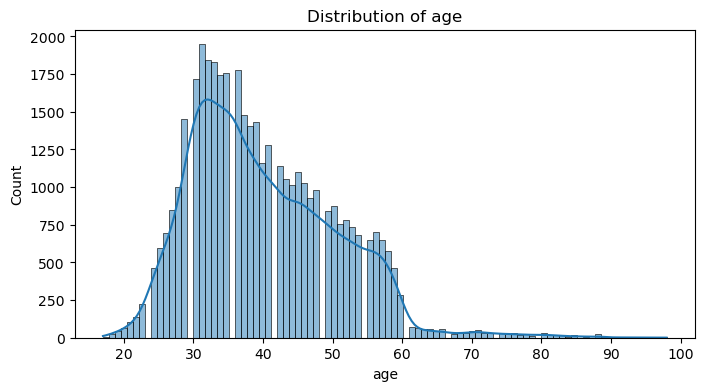

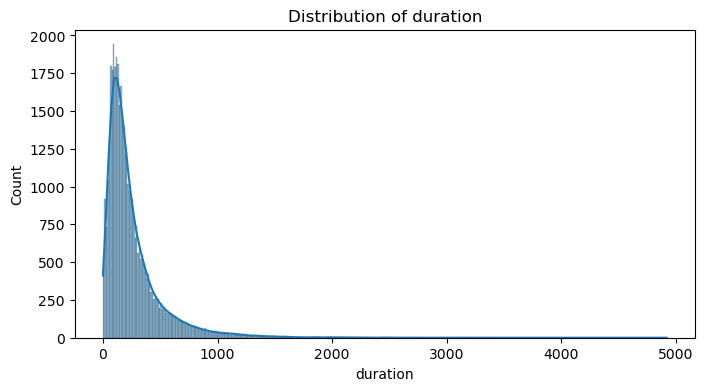

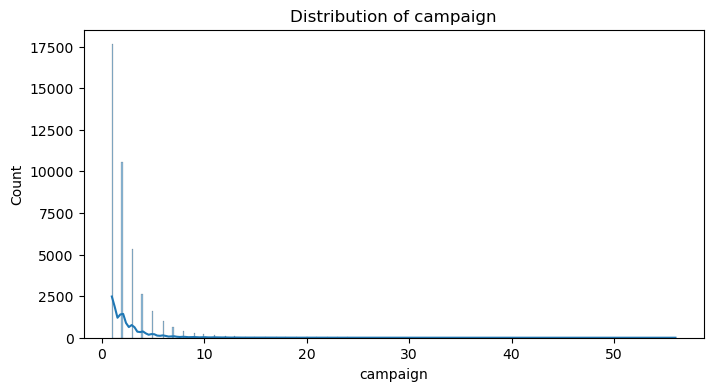

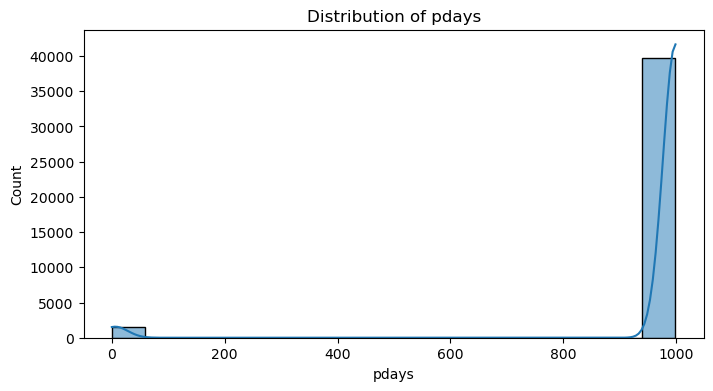

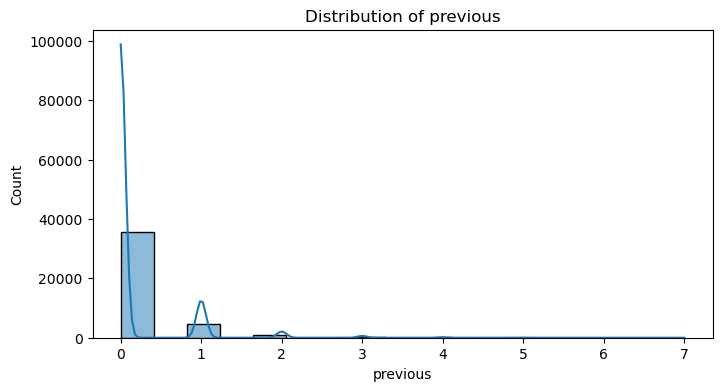

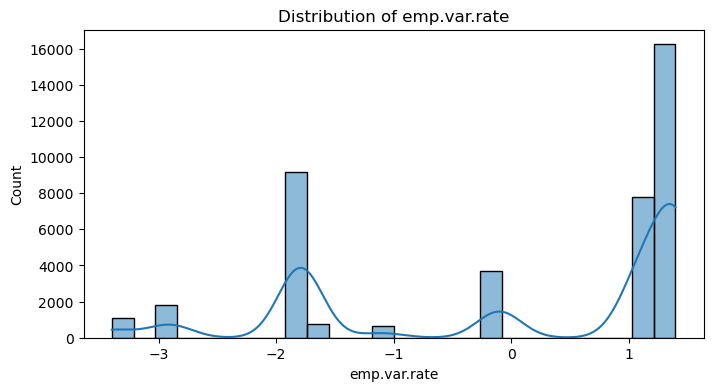

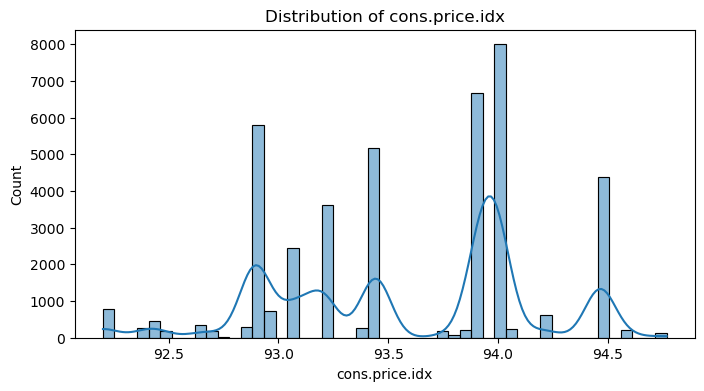

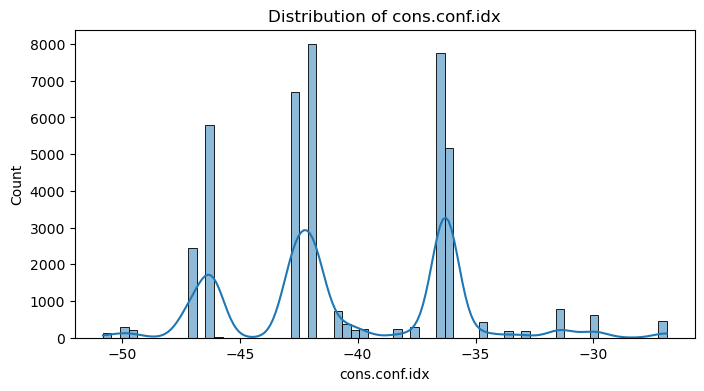

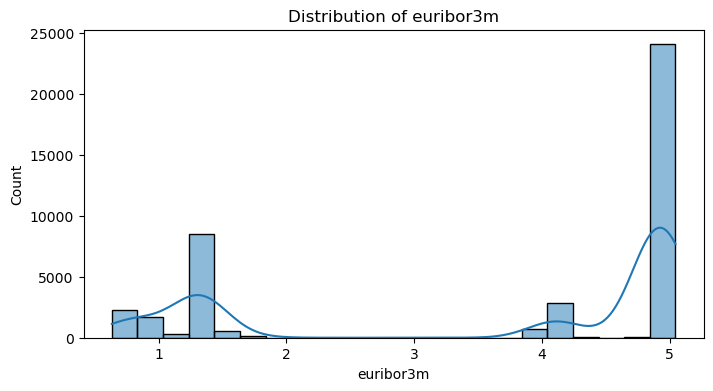

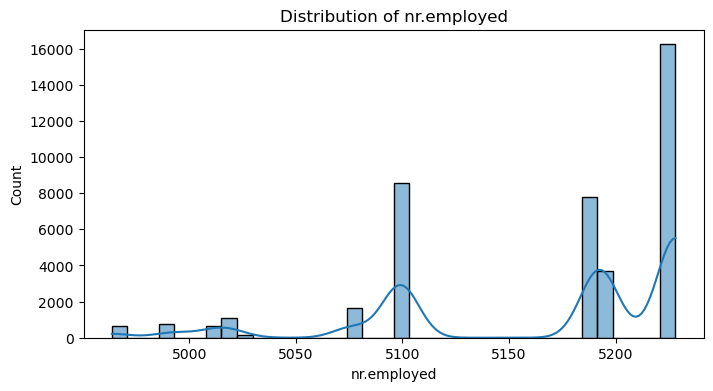

In [34]:
#Loop for numeric features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


##  Findings

- Most numeric features such as `age` and `duration` show moderate skewness, with clear peaks around typical values.
- The `campaign` feature is heavily right-skewed, indicating that most clients were contacted a small number of times, while a few were contacted multiple times. This supports the decision to apply a log transformation.
- Boxplots revealed the presence of outliers in variables such as `duration` and `campaign`, which were treated using the IQR method.
- Overall, the distribution plots helped identify variables that may benefit from scaling or transformation, and confirmed that the data is generally well-structured for further modeling.


## Univariate Distribution Analysis for Categorical Features

Here, we analyze the distribution of all categorical features individually.  
For each categorical column, we plot a countplot to visualize the frequency of each category.  
This helps us identify which categories are most or least common, detect any class imbalance, and decide whether to combine rare categories or handle imbalance during modeling.


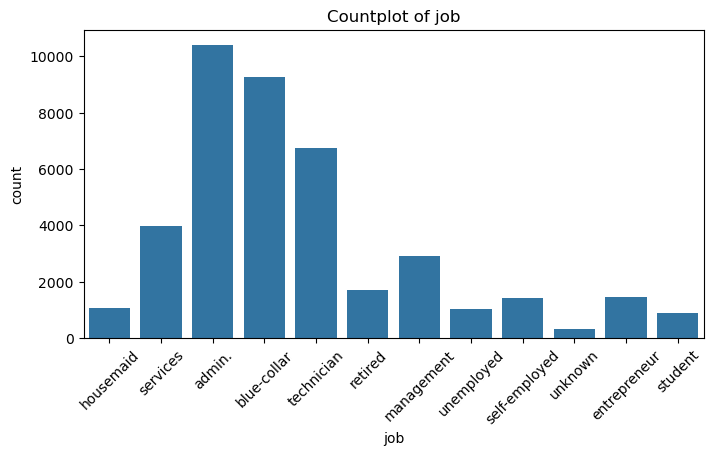

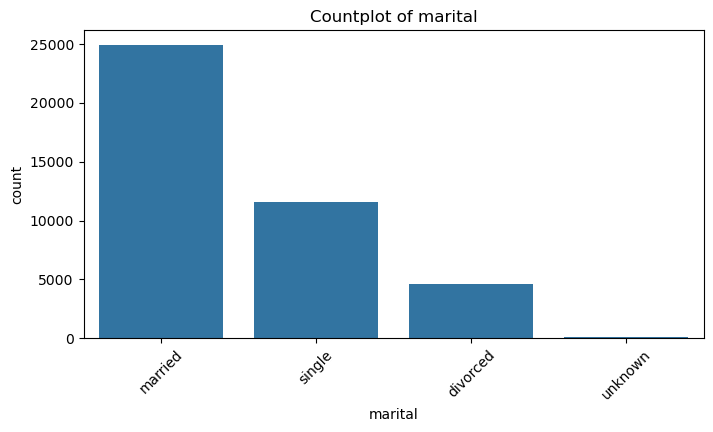

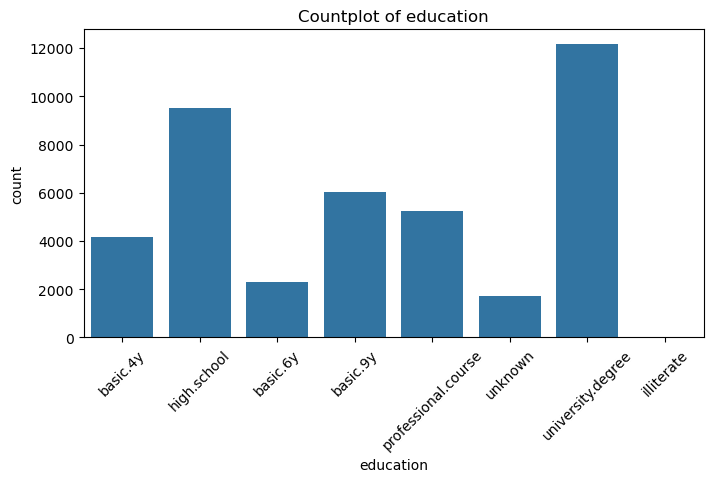

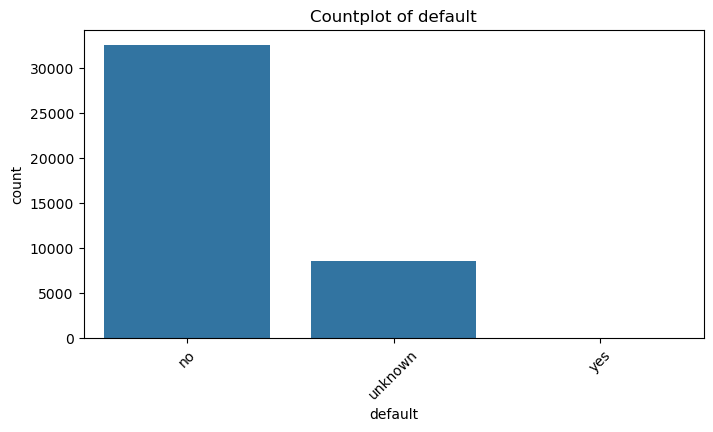

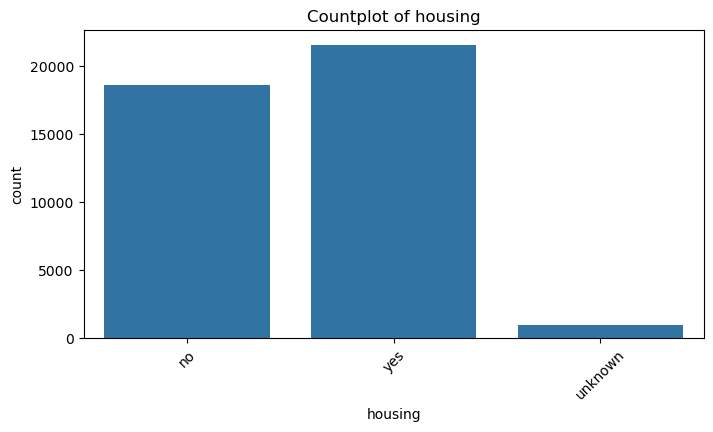

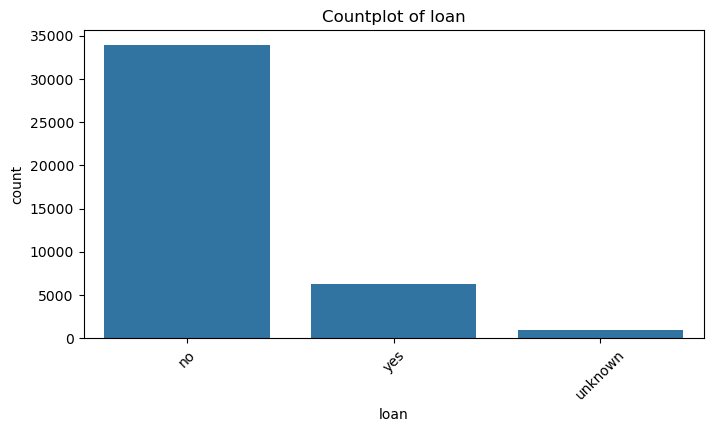

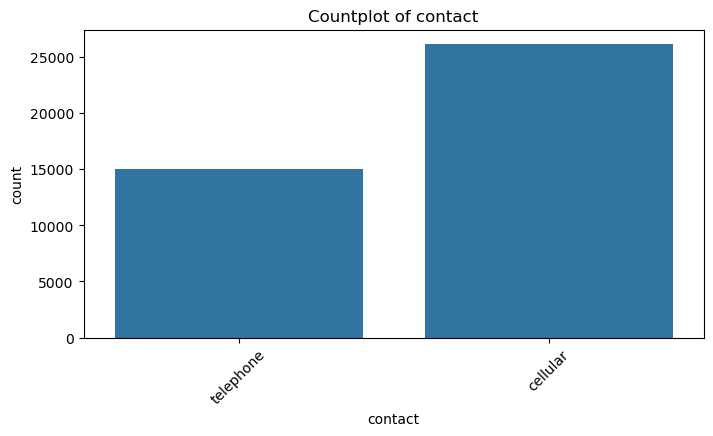

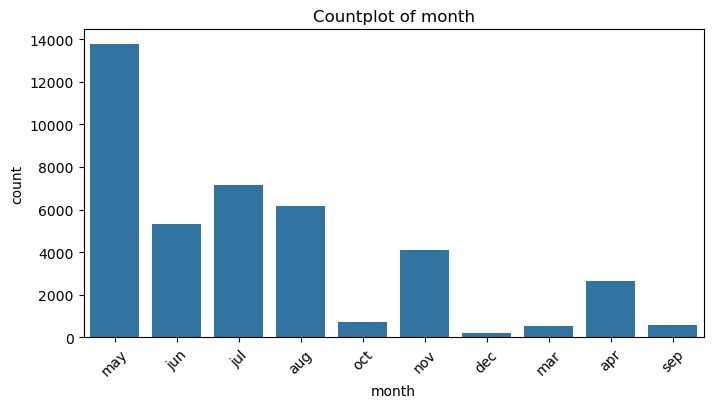

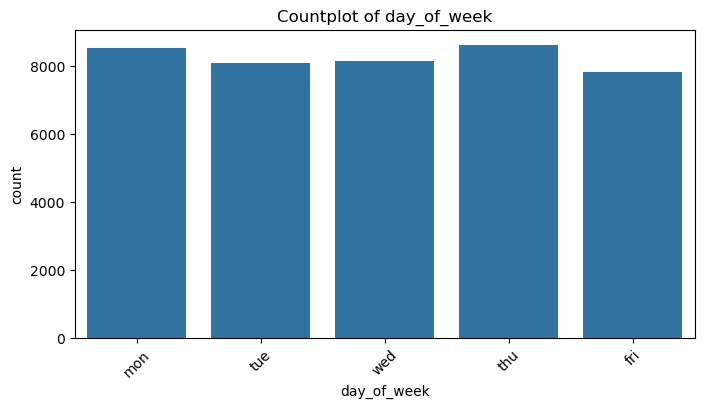

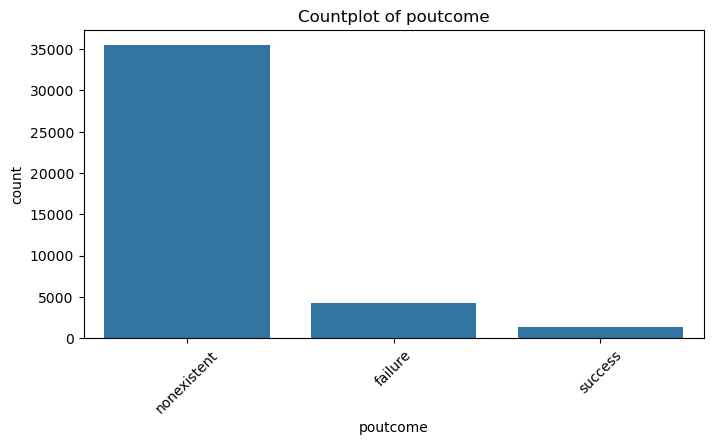

In [38]:
# Loop for Categorical features
categorical_features = ['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month',
                        'day_of_week', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


## Findings from Univariate Analysis of Categorical Features

- The countplots show that some categorical features have dominant categories. For example, the `job` feature is mostly concentrated in `admin.`, `blue-collar`, and `technician` roles.
- The `marital` feature reveals that most clients are married, with fewer single or divorced clients.
- The `education` feature indicates a higher number of clients with secondary and tertiary education levels.
- Binary features like `housing` and `loan` highlight how many clients have housing or personal loans.
- The `contact` and `month` features help understand which communication channels and months are most common for marketing outreach.
- Overall, these plots help detect any rare categories that could be grouped together and show if any classes are highly imbalanced, which is important for modeling decisions later.


### Outliers Detection and Handling

In [42]:
# Detecting Outliers using IQR method
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Outlier detection using IQR method:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")


Outlier detection using IQR method:
age: 468 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 1515 outliers
previous: 5625 outliers
emp.var.rate: 0 outliers
cons.price.idx: 0 outliers
cons.conf.idx: 446 outliers
euribor3m: 0 outliers
nr.employed: 0 outliers


#### Boxplot Visualization
The boxplot below shows the distribution of numeric columns before handling outliers.  
Outliers are displayed as points beyond the whiskers of the plot. This helps visually identify which features contain extreme values.


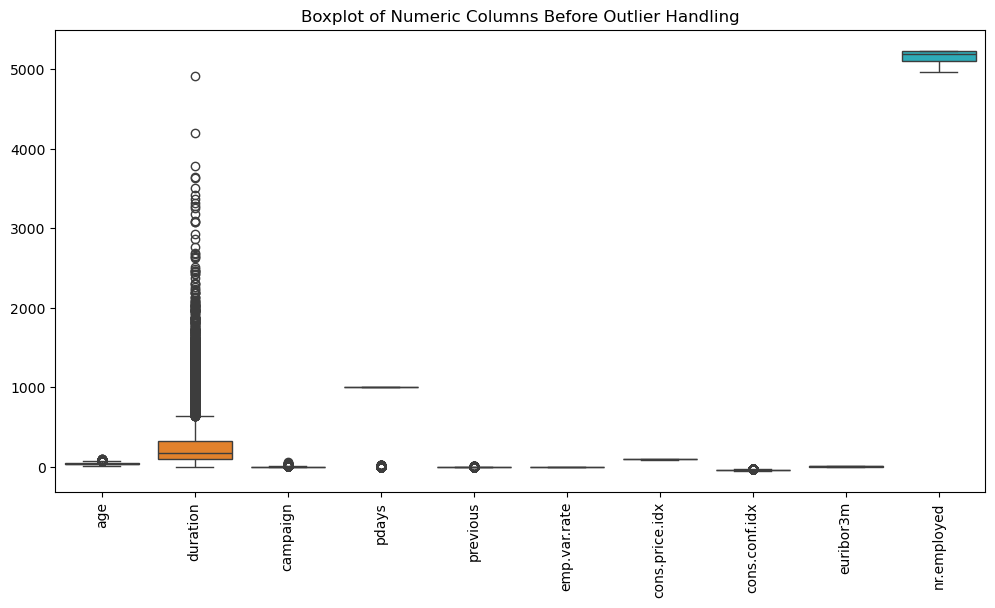

In [45]:
# Visualizing outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns Before Outlier Handling")
plt.xticks(rotation=90)
plt.show()

In [47]:
# Handling Outliers (removing them using IQR method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Check shape after removing outliers
print("Shape of DataFrame after outlier handling:", df.shape)


Shape of DataFrame after outlier handling: (23098, 21)


## Bivariate Analysis: Features vs Target

In this section, we analyze how each feature relates to the target variable (`subscribed`).  
Categorical features are visualized with countplots using a `hue` for the target.  
Numeric features are visualized with boxplots to show how their distribution differs by subscription status.


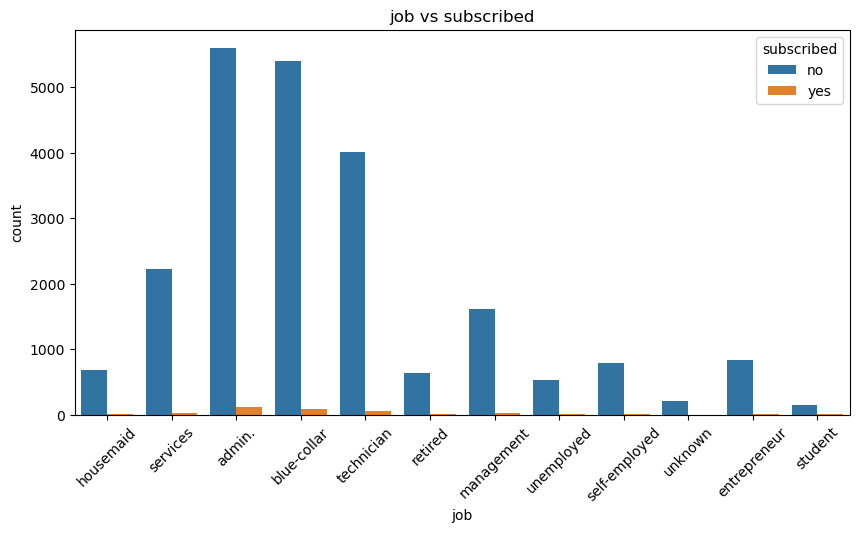

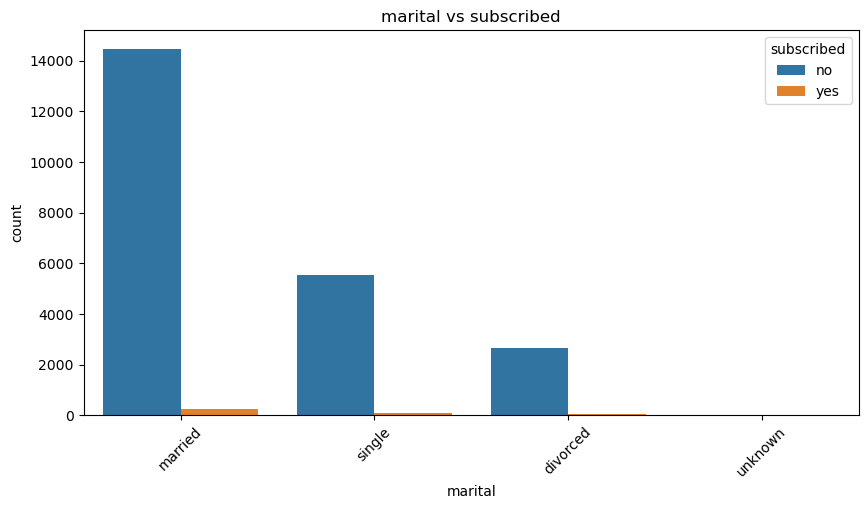

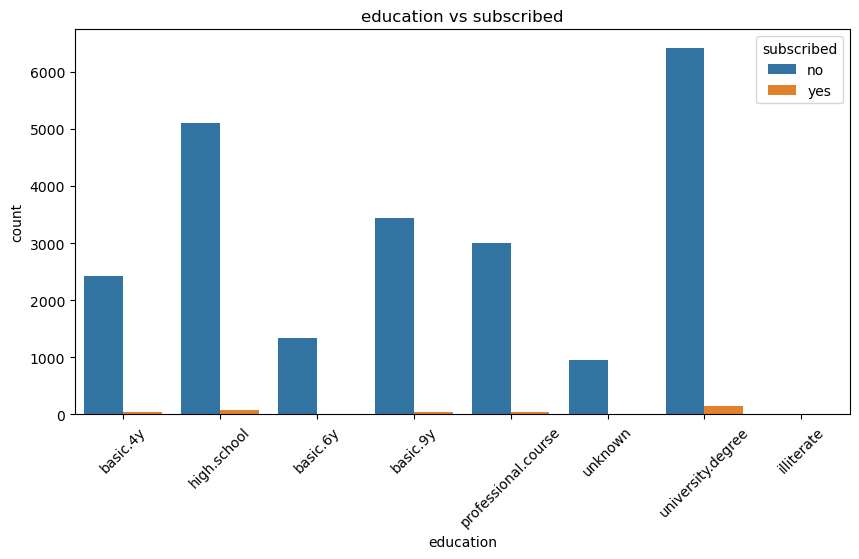

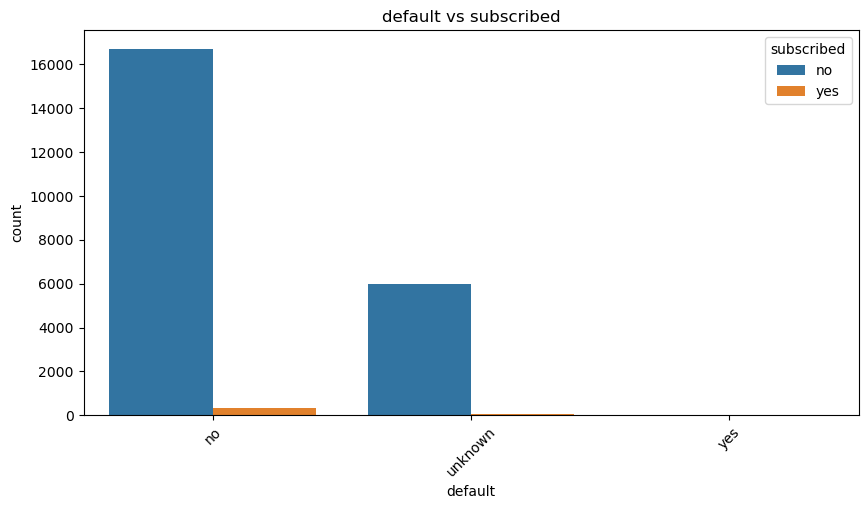

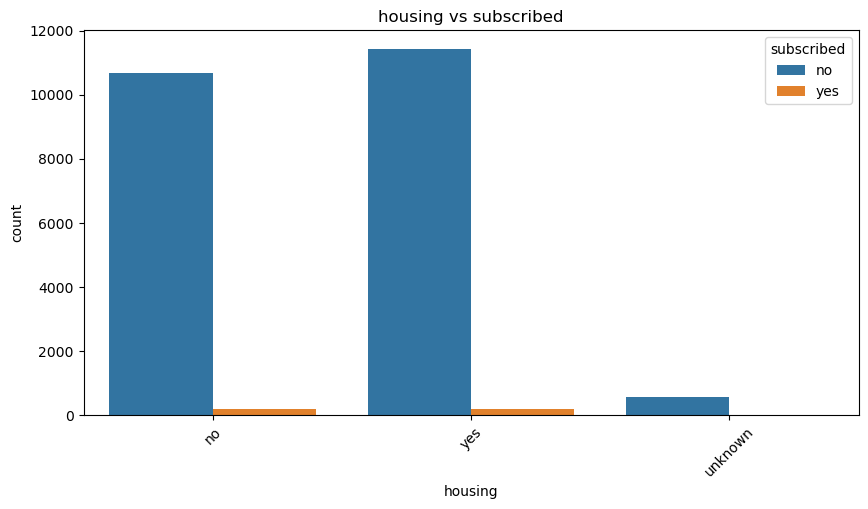

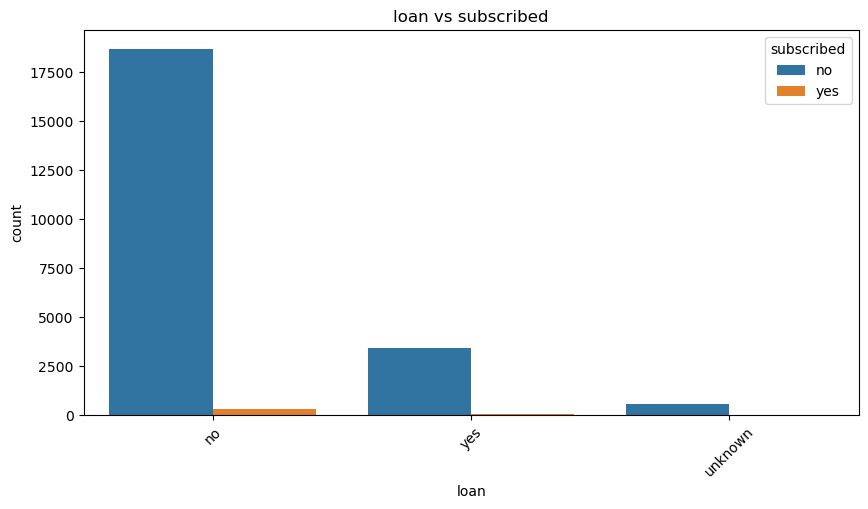

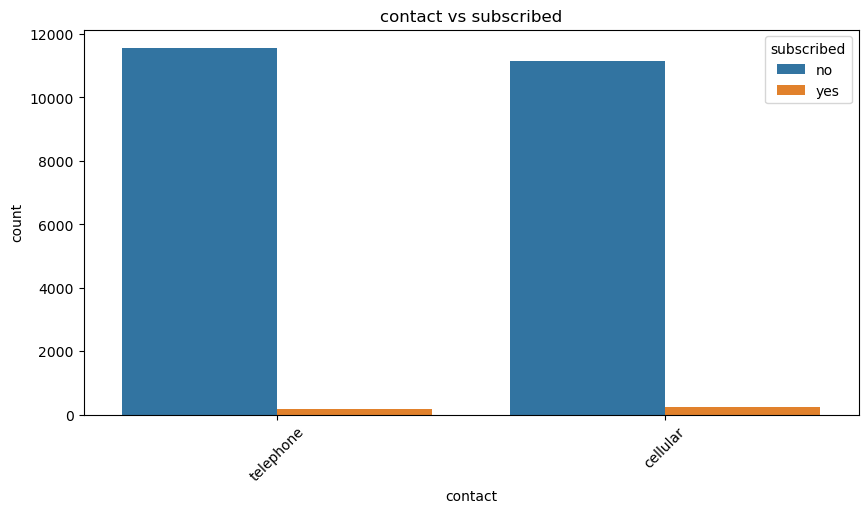

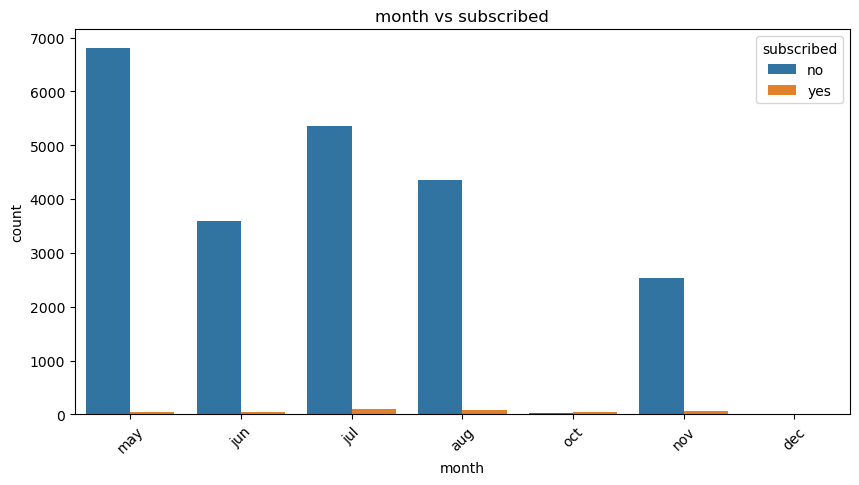

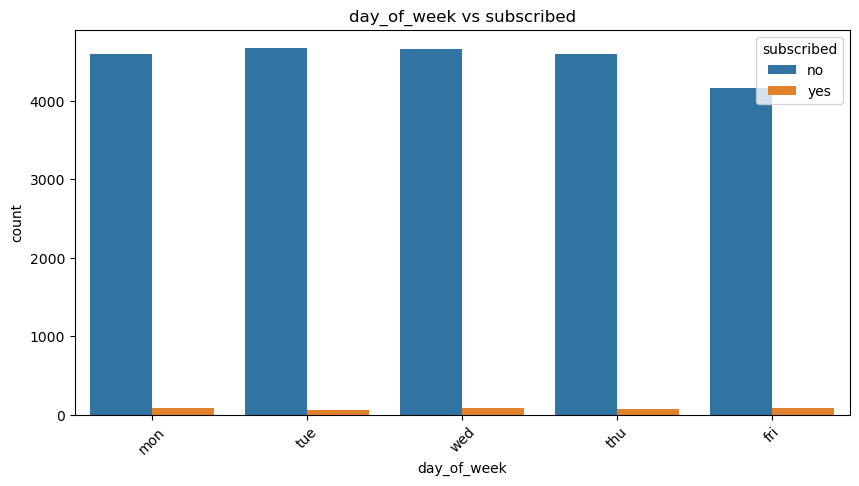

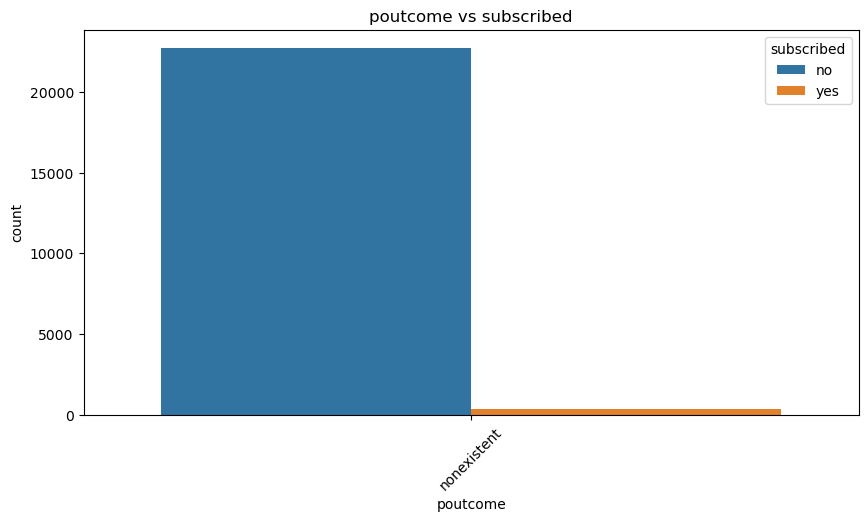

In [50]:
categorical_features = ['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month',
                        'day_of_week', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], hue=df['subscribed'])
    plt.title(f"{col} vs subscribed")
    plt.xticks(rotation=45)
    plt.show()

## Findings from Bivariate Analysis of Categorical Features vs Target

The countplots show how each category within the categorical features affects the subscription outcome.  
For example, certain jobs or education levels may have a higher proportion of clients who subscribed to the term deposit.  
This helps identify which categorical variables might have predictive power for the target and highlights any dominant or rare categories.


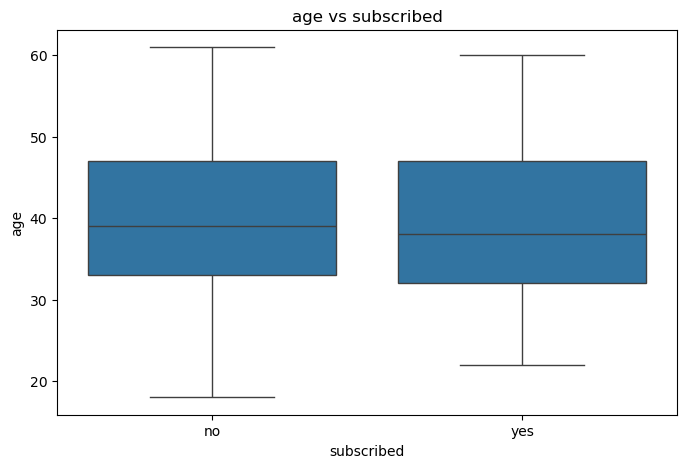

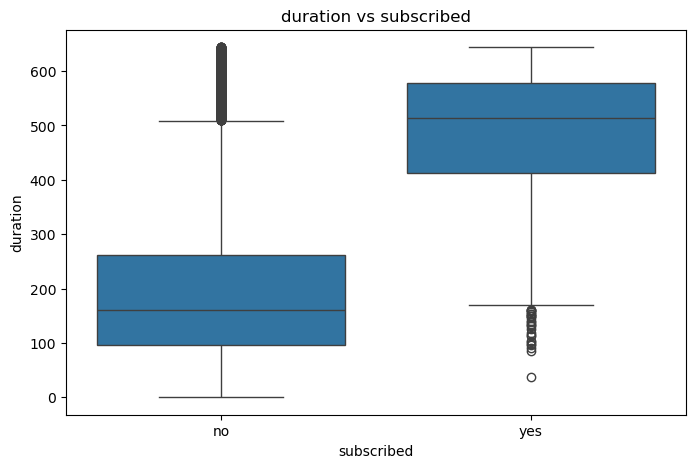

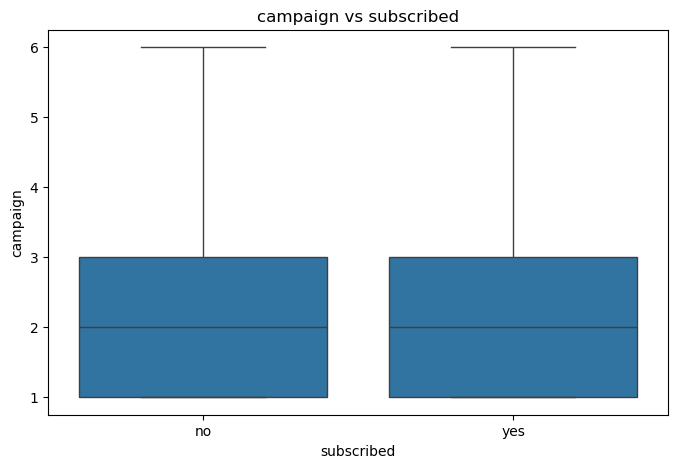

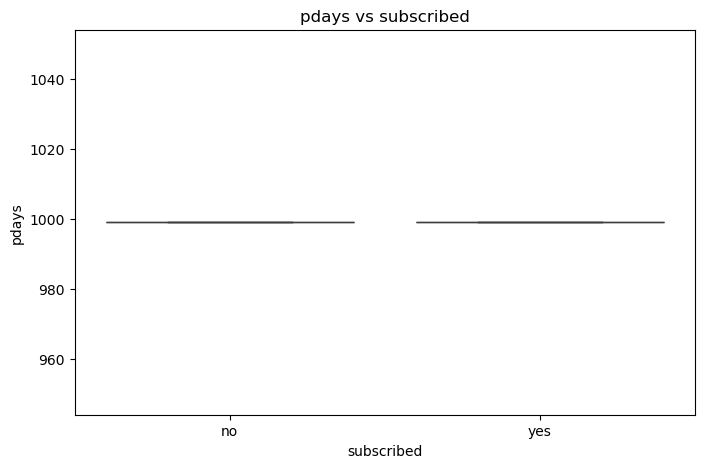

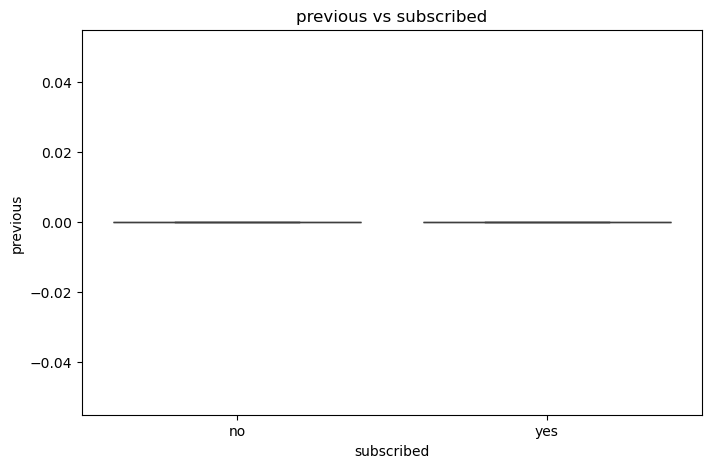

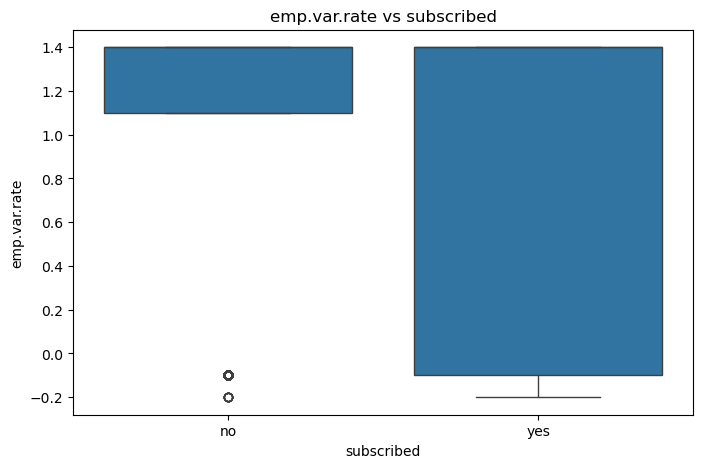

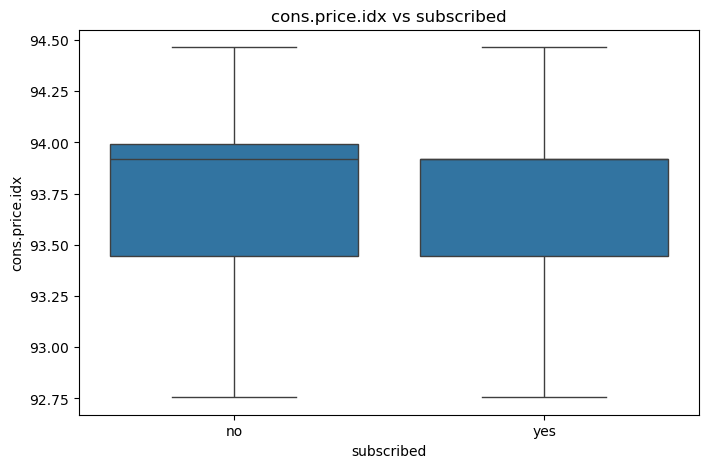

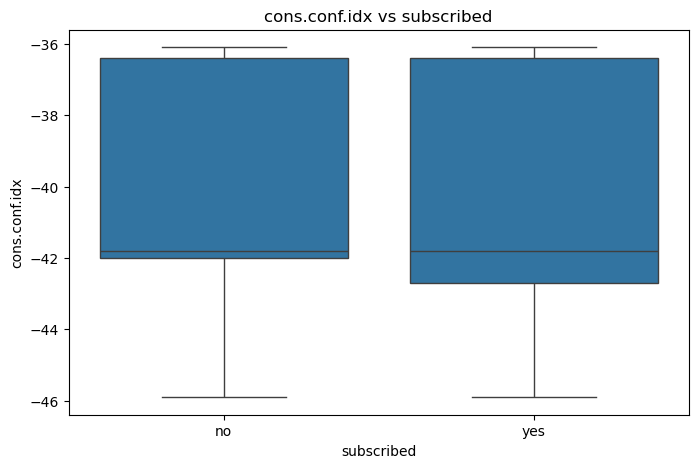

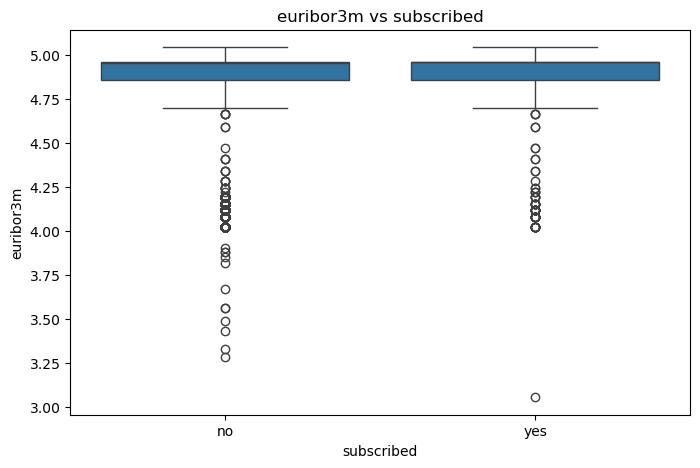

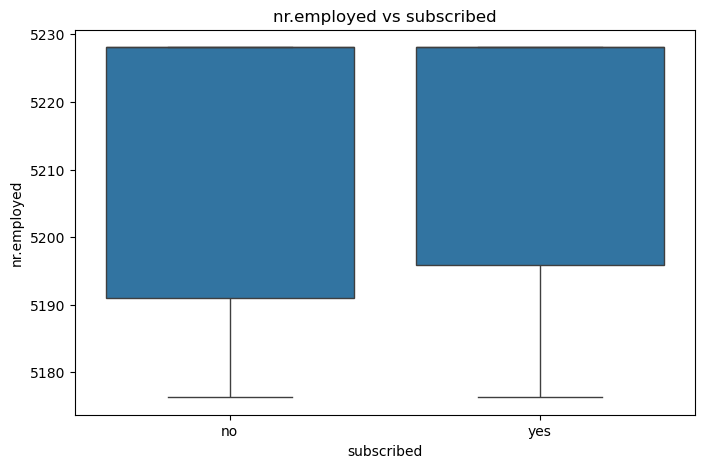

In [53]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 
                    'previous', 'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['subscribed'], y=df[col])
    plt.title(f"{col} vs subscribed")
    plt.show()


## Findings from Bivariate Analysis of Numeric Features vs Target

The boxplots reveal how the distribution of numeric features varies with the target (`subscribed`).  
For example, the average duration of calls or age may differ significantly between clients who subscribed and those who did not.  
These plots help detect whether numeric features show meaningful separation, which is useful for feature selection and model interpretation.


### Encoding

In [57]:
# Encoding categorical features
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [59]:
print("\nInfo After Encoding:\n")
print(df.info())


Info After Encoding:

<class 'pandas.core.frame.DataFrame'>
Index: 23098 entries, 0 to 27689
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            23098 non-null  int64  
 1   contact                        23098 non-null  int32  
 2   duration                       23098 non-null  int64  
 3   campaign                       23098 non-null  int64  
 4   pdays                          23098 non-null  int64  
 5   previous                       23098 non-null  int64  
 6   emp.var.rate                   23098 non-null  float64
 7   cons.price.idx                 23098 non-null  float64
 8   cons.conf.idx                  23098 non-null  float64
 9   euribor3m                      23098 non-null  float64
 10  nr.employed                    23098 non-null  float64
 11  subscribed                     23098 non-null  int32  
 12  job_blue-collar             

In [61]:
print("\nFirst 5 rows After Encoding:\n")
print(df.head())


First 5 rows After Encoding:

   age  contact  duration  campaign  pdays  previous  emp.var.rate  \
0   56        1       261         1    999         0           1.1   
1   57        1       149         1    999         0           1.1   
2   37        1       226         1    999         0           1.1   
3   40        1       151         1    999         0           1.1   
4   56        1       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_dec  month_jul  \
0          93.994          -36.4      4.857  ...      False      False   
1          93.994          -36.4      4.857  ...      False      False   
2          93.994          -36.4      4.857  ...      False      False   
3          93.994          -36.4      4.857  ...      False      False   
4          93.994          -36.4      4.857  ...      False      False   

   month_jun  month_may  month_nov  month_oct  day_of_week_mon  \
0      False       True      False   

### Skewness

In [64]:
#  Checking Skewness of Numerical Features with Categorization

# Select only numeric columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [66]:
 #Calculate skewness for each numeric feature
skewness = df[numerical_features].skew().sort_values(ascending=False)

# Categorize skewness into three levels
fairly_skewed = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderately_skewed = skewness[((skewness > 0.5) & (skewness <= 1)) | ((skewness < -0.5) & (skewness >= -1))]
highly_skewed = skewness[(skewness > 1) | (skewness < -1)]

In [68]:
# Display all categories
print("Skewness of Numeric Features:\n", skewness)
print("\n Fairly Skewed Features (approx. symmetric):\n", fairly_skewed)
print("\n Moderately Skewed Features:\n", moderately_skewed)
print("\n Highly Skewed Features (need transformation):\n", highly_skewed)

Skewness of Numeric Features:
 campaign          1.203600
duration          1.118912
age               0.314911
cons.conf.idx     0.011228
pdays             0.000000
previous          0.000000
cons.price.idx   -0.149074
nr.employed      -0.373189
emp.var.rate     -2.046638
euribor3m        -2.345389
dtype: float64

 Fairly Skewed Features (approx. symmetric):
 age               0.314911
cons.conf.idx     0.011228
pdays             0.000000
previous          0.000000
cons.price.idx   -0.149074
nr.employed      -0.373189
dtype: float64

 Moderately Skewed Features:
 Series([], dtype: float64)

 Highly Skewed Features (need transformation):
 campaign        1.203600
duration        1.118912
emp.var.rate   -2.046638
euribor3m      -2.345389
dtype: float64


In [70]:
# Apply log transformation to reduce skewness in 'campaign' and'duration
df['campaign'] = np.log1p(df['campaign'])  # log1p handles 0 safely
df['duration'] = np.log1p(df['duration']) 
# Check skewness again to confirm improvement
print("Skewness of 'campaign' after log transformation:", df['campaign'].skew())
print("Skewness of 'duration' after log transformation:", df['duration'].skew())

Skewness of 'campaign' after log transformation: 0.6156904609020426
Skewness of 'duration' after log transformation: -0.5776973406151837


### Log Transformation
The `campaign` column was highly skewed (skewness > 1).  
To reduce its skewness and make the distribution more normal, a log transformation was applied using `np.log1p()`.

This helps improve model performance, especially for algorithms sensitive to skewed data.


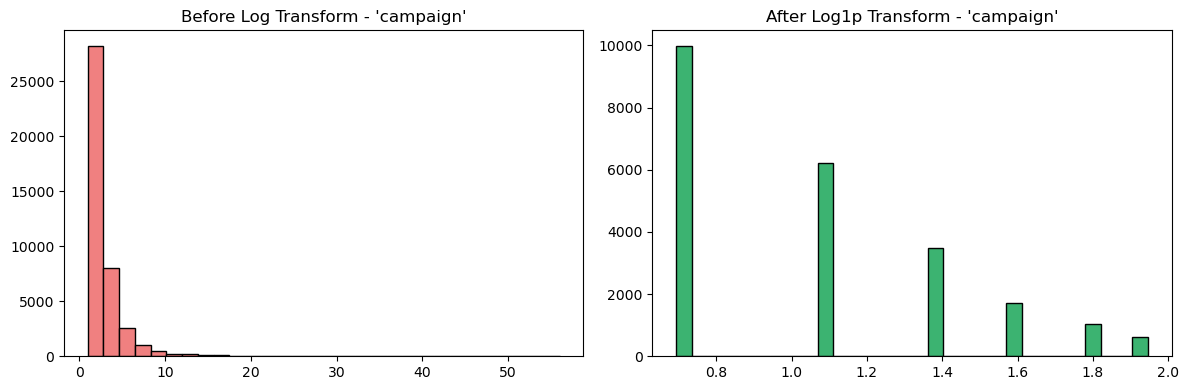

In [73]:
# Compare 'campaign' before and after log transform
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before
df_raw = pd.read_csv("bank_marketing.csv")
axes[0].hist(df_raw['campaign'], bins=30, color='lightcoral', edgecolor='black')
axes[0].set_title("Before Log Transform - 'campaign'")

# After
axes[1].hist(df['campaign'], bins=30, color='mediumseagreen', edgecolor='black')
axes[1].set_title("After Log1p Transform - 'campaign'")

plt.tight_layout()
plt.show()


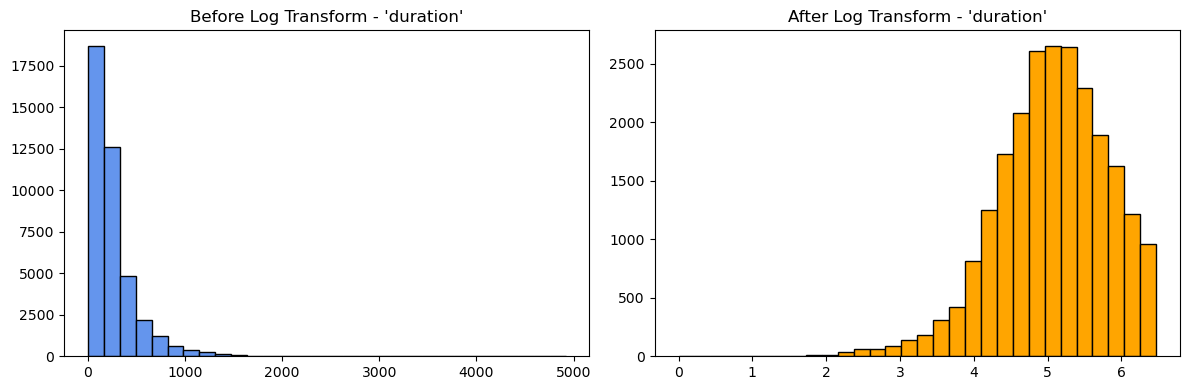

In [75]:
# Plot before & after log transform for 'duration'
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_raw['duration'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title("Before Log Transform - 'duration'")

plt.subplot(1, 2, 2)
plt.hist(df['duration'], bins=30, color='orange', edgecolor='black')
plt.title("After Log Transform - 'duration'")

plt.tight_layout()
plt.show()


### Skewness Correction
The `campaign` column initially had high positive skewness (1.18).  
After applying log transformation using `np.log1p()`, the skewness reduced to approximately 0.59.  
This makes the data distribution more normal and suitable for machine learning models.


### Histogram: Before vs After Log Transformation

To visually confirm the effect of log transformation, we compared the distribution of selected features (`campaign`, `duration`) before and after transformation. The result shows reduced skewness and better symmetry.


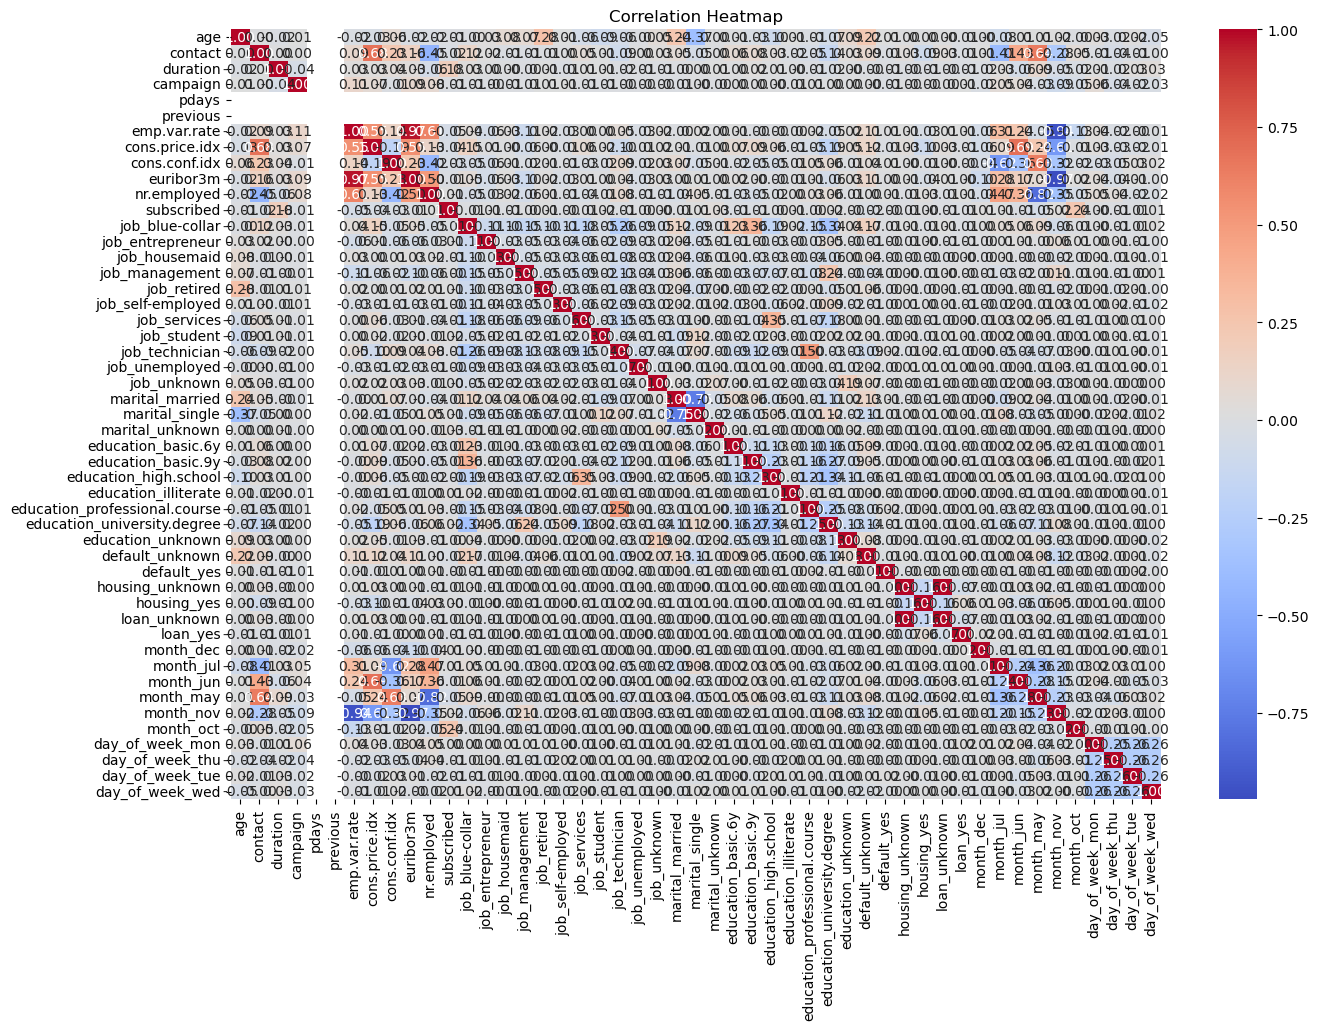

In [79]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###  Feature Selection using Correlation Matrix

Feature selection helps remove irrelevant or redundant features to improve model performance.

In this step, we used a **correlation heatmap** to visualize the relationships between numerical features. Highly correlated features (correlation > 0.9 or < -0.9) may introduce redundancy. We can optionally drop one of the highly correlated features to avoid multicollinearity in models like Logistic Regression.


### Target Variable Distribution

Before training our model, it's useful to check the balance of the target variable (`subscribed`).

This plot shows how many customers subscribed (`yes`) versus how many did not (`no`). This helps in understanding whether we are dealing with a balanced or imbalanced classification problem.


C:\Users\athir\AppData\Local\Temp\ipykernel_2596\61102095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subscribed', palette='Set2')


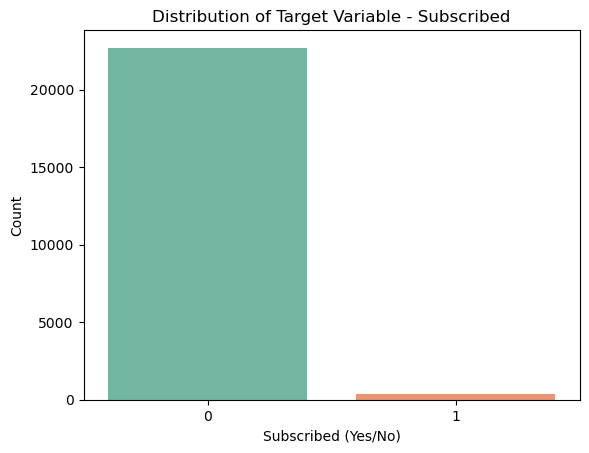

In [82]:
#Bar plot of target variable
sns.countplot(data=df, x='subscribed', palette='Set2')
plt.title("Distribution of Target Variable - Subscribed")
plt.xlabel("Subscribed (Yes/No)")
plt.ylabel("Count")
plt.show()

### Train-Test Split

In [86]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (18478, 48)
Testing set shape: (4620, 48)



To evaluate the performance of our machine learning model, we split the dataset into:
- **Training set (80%)** – used to train the model
- **Testing set (20%)** – used to test how well the model performs on unseen data

We used `train_test_split()` from `sklearn.model_selection` with a random seed for reproducibility.


### Apply SMOTE to training data

In [90]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)


In [92]:
# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [94]:
# Check new balance
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_resampled.value_counts())


Before SMOTE:
 subscribed
0    18169
1      309
Name: count, dtype: int64

After SMOTE:
 subscribed
0    18169
1    18169
Name: count, dtype: int64


In [96]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


###  Feature Scaling (Standardization)

Many machine learning models are sensitive to the scale of input data — especially those based on distance (like KNN, SVM, Logistic Regression).

We used **StandardScaler** to standardize features:
- Mean = 0
- Standard Deviation = 1

Note: Scaling is **not needed for tree-based models** like Decision Trees or Random Forest.


## Exploratory Data Analysis (EDA) Summary

After performing thorough exploratory data analysis and preprocessing, the following key insights and actions were observed:

- **Missing Values:**  
  No missing values were found in the dataset, so imputation was not required.

- **Duplicate Records:**  
  Duplicate rows were identified and removed to ensure data quality.

  - **Univariate Analysis:**  
  Distribution plots were created for all numerical and categorical features to understand their spread, skewness, and class balance.

- **Bivariate Analysis:**  
  Relationships between each feature and the target variable (`subscribed`) were visualized using countplots (for categorical) and boxplots (for numerical). This helped identify which features are potentially influential for prediction.

- **Outliers:**  
  Outliers were detected using the IQR (Interquartile Range) method. They were visualized using boxplots and handled by filtering data within acceptable ranges.

- **Skewness Handling:**  
  The `campaign` and `duration` columns showed high positive skewness. Log transformation (`log1p`) was applied to normalize these features, improving their distribution.

- **Encoding Categorical Features:**  
  Label Encoding was applied to binary categorical columns, while One-Hot Encoding was used for multi-class categorical features.

- **Feature Selection:**  
  A correlation heatmap was generated to examine relationships among numerical features. Highly correlated features can be considered for removal to avoid multicollinearity.

- **Train-Test Split & Scaling:**  
  The dataset was split into training and testing sets (80/20 split), and standardization was applied using `StandardScaler` to normalize the feature ranges.

The dataset is now clean, transformed, and ready for model building. 


## Model Training and Evaluation

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42, probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [105]:
model_accuracies = {}

for name, model in models.items():
    print(f"\nModel: {name}")

    # Fit
    model.fit(X_train_scaled, y_train_resampled)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.9433

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4532
           1       0.17      0.49      0.25        88

    accuracy                           0.94      4620
   macro avg       0.58      0.72      0.61      4620
weighted avg       0.97      0.94      0.96      4620


Confusion Matrix:
 [[4315  217]
 [  45   43]]

Model: Random Forest
Accuracy: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4532
           1       0.62      0.20      0.31        88

    accuracy                           0.98      4620
   macro avg       0.80      0.60      0.65      4620
weighted avg       0.98      0.98      0.98      4620


Confusion Matrix:
 [[4521   11]
 [  70   18]]

Model: SVC
Accuracy: 0.9699

Classification Report:
               precision    recall  f1-score   support

         

#### Model Accuracy Comparison

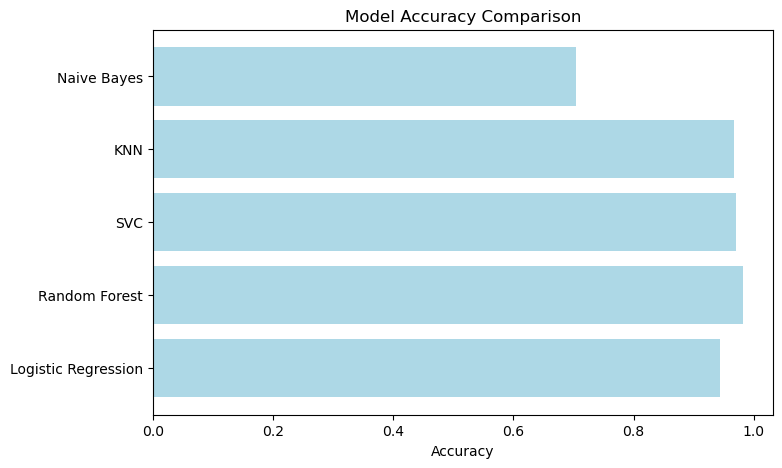

In [110]:
plt.figure(figsize=(8, 5))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='lightblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


## Model Building and Evaluation

In this project, five different classification algorithms were used to predict the target variable:
- Logistic Regression
- Random Forest Classifier
- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN)
- Naive Bayes

All models were trained on a balanced training dataset created using SMOTE and evaluated on the original test data. Feature scaling was applied to ensure fair training for models that require it.

###  Key Observations

- **Logistic Regression:** Achieved high overall accuracy (~94%) but struggled to correctly identify the minority class (class 1). It had low precision and moderate recall for this class.
- **Random Forest:** Gave the highest overall accuracy (~98%) and performed better than Logistic Regression in detecting the minority class, with higher precision but lower recall.
- **SVC:** Also performed well overall (~97% accuracy) and slightly better than Logistic Regression for minority class detection.
- **KNN:** Showed similar accuracy to SVC but lower performance for the minority class.
- **Naive Bayes:** Produced much lower overall accuracy (~70%) but its recall for the minority class was the highest among all models, although its precision was very low — indicating many false positives.

These results show that while overall accuracy is high, the ability to correctly predict the minority class varies widely. This is expected when working with imbalanced data, even when using resampling techniques like SMOTE.

###  Conclusion

Based on this comparison, the  **Random Forest Classifier** performed best when balancing high overall accuracy with relatively better detection of the minority class. For further improvement, techniques like hyperparameter tuning, advanced ensemble methods, or adjusting class weights could be explored.

Using multiple algorithms provided a clear view of how different models handle the same dataset and highlighted the importance of evaluating not just accuracy but also how well minority classes are predicted.


# Final Conclusion

This project focused on predicting whether a customer will **subscribe** to a term deposit based on their demographic and marketing-related information. After thorough data cleaning, balancing, feature scaling, and model building, five different machine learning algorithms were compared. 

The **Random Forest Classifier** achieved the best balance between high overall accuracy and reasonable detection of customers who are likely to subscribe, even with an imbalanced dataset. 

This project shows how machine learning can help financial institutions identify potential subscribers more accurately, which can guide marketing strategies and improve campaign effectiveness.

Further improvements could include hyperparameter tuning, more advanced ensemble methods, and better handling of class imbalance to increase precision and recall for predicting subscription.

